In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import histogram
import os
os.makedirs('./plot', exist_ok=True)

In [33]:
# Importing ISBG as dataframe
ISBG = pd.read_excel("./data/ISBSG-whole.xlsx",header=3)
# ISBG.set_index("Project ID", inplace=True)

# Find standard data explortation below

In [34]:
ISBG.head()


,ISBSG Project ID,Data Quality Rating,UFP rating,Year of Project,Industry Sector,Organisation Type,Application Group,Application Type,Development Type,Development Platform,...,Added count,Changed count,Deleted count,COSMIC Entry,COSMIC Exit,COSMIC Read,COSMIC Write,Lines of Code,Lines of Code not Statements,Other Size Units
0,10001,D,A,1998,Service Industry,Recreation & Personnel Services;,Business Application,Transaction/Production System;,New Development,MR,...,237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10011,B,A,1996,Construction,Construction;,Business Application,Stock control & order processing;,New Development,Multi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10012,B,A,2002,Wholesale & Retail,Billing;,Business Application,Billing;,Enhancement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10014,B,A,2004,NaN,NaN,NaN,NaN,Enhancement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10015,B,A,2000,Wholesale & Retail,Wholesale & Retail Trade;,Business Application,Management Information System;,Enhancement,MF,...,35.0,347.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# nan_counts = ISBG_interest.isna().sum()
#
# # Create a dictionary with column names as keys and their NaN counts as values
# nandict = {}
# for column, count in nan_counts.items():
#     nandict[column] = count
#
# # Convert the dictionary into a DataFrame
# nandictdf = pd.DataFrame(list(nandict.items()), columns=['Column', 'NaN Count'])
# nandictdf = nandictdf.transpose()
# nandictdf


In [36]:
#Cols of interest:
cols_needed = ['Max Team Size','COSMIC Read','COSMIC Write','COSMIC Entry','COSMIC Exit','Functional Size','Project Elapsed Time','Development Platform','Primary Programming Language','Summary Work Effort']
ISBG_interest = ISBG[cols_needed]
ISBG_interest.head()

,Max Team Size,COSMIC Read,COSMIC Write,COSMIC Entry,COSMIC Exit,Functional Size,Project Elapsed Time,Development Platform,Primary Programming Language,Summary Work Effort
0,5.0,NaN,NaN,NaN,NaN,237.0,6.0,MR,Oracle,1850.0
1,NaN,NaN,NaN,NaN,NaN,443.0,2.6,Multi,Access,796.0
2,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,COBOL,1100.0
3,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,28.0
4,NaN,NaN,NaN,NaN,NaN,382.0,3.0,MF,COBOL,22000.0


In [37]:
ISBG_interest.info()
ISBG_interest.describe()
total_count = len(ISBG_interest['COSMIC Write'])
total_count_afterNANremoval = total_count - 5703
print(total_count,total_count_afterNANremoval)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5957 entries, 0 to 5956
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Max Team Size                 2155 non-null   float64
 1   COSMIC Read                   254 non-null    float64
 2   COSMIC Write                  254 non-null    float64
 3   COSMIC Entry                  254 non-null    float64
 4   COSMIC Exit                   254 non-null    float64
 5   Functional Size               5767 non-null   float64
 6   Project Elapsed Time          5231 non-null   float64
 7   Development Platform          4540 non-null   object 
 8   Primary Programming Language  4615 non-null   object 
 9   Summary Work Effort           5941 non-null   float64
dtypes: float64(8), object(2)
memory usage: 465.5+ KB
5957 254


254


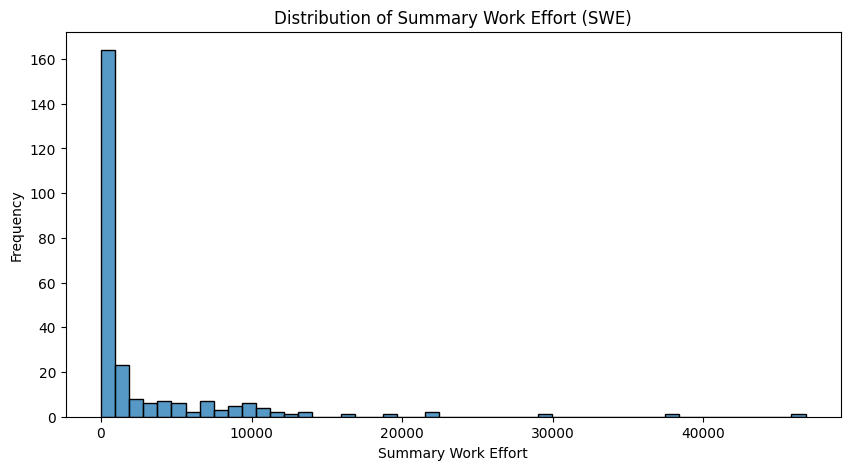

In [38]:
df_clean = ISBG_interest.dropna(subset=["COSMIC Read", "COSMIC Write", "COSMIC Exit", "COSMIC Entry"])
print(len(df_clean))
plt.figure(figsize=(10,5))
sns.histplot(df_clean['Summary Work Effort'], kde=False, bins=50)  # Set bins and kde to False

plt.title('Distribution of Summary Work Effort (SWE)')
plt.xlabel('Summary Work Effort')
plt.ylabel('Frequency')
plt.savefig('./plot/dfCleanhistogram.svg')
plt.show()


In [39]:
import pandas as pd
from sklearn.impute import KNNImputer



# One-hot encode non-numeric (categorical) columns.
df_encoded = pd.get_dummies(df_clean)

# Create an instance of KNNImputer with desired number of neighbors.
imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

df_imputed.head()

# Describe data before normalization


,Max Team Size,COSMIC Read,COSMIC Write,COSMIC Entry,COSMIC Exit,Functional Size,Project Elapsed Time,Summary Work Effort,Development Platform_MF,Development Platform_MR,...,Primary Programming Language_Java,Primary Programming Language_Oracle,Primary Programming Language_PHP,Primary Programming Language_PL/I,Primary Programming Language_RPG,Primary Programming Language_Script Language,Primary Programming Language_TNSDL,Primary Programming Language_Visual Basic,Primary Programming Language_Visual C++,Primary Programming Language_Visual Studio .Net
0,4.0,12.0,32.0,68.0,71.0,183.0,2.8,460.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,197.0,110.0,232.0,287.0,826.0,44.0,2503.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,13.0,1.0,7.0,5.0,26.0,12.0,40.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,7.0,7.0,46.0,18.0,78.0,24.0,270.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,6.0,8.0,22.0,19.0,55.0,5.0,740.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## I am trying to scale the numerical values (not one-hot encoded) and log transform the output

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Suppose df_imputed contains both features and target
swe= df_imputed['Summary Work Effort'] 
X = df_imputed.drop(columns=['Summary Work Effort']) 
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_cols]
X_other = X.drop(columns=numeric_cols) 

# Scale only the numeric part
scaler = MinMaxScaler()
X_scaled_numeric = pd.DataFrame(scaler.fit_transform(X_numeric), columns=numeric_cols)
swe=np.log(swe)

# Combine scaled numeric + other columns (like one-hot encoded)
X_final = pd.concat([X_scaled_numeric, X_other, swe], axis=1)

print(X_final.head())

   Max Team Size  COSMIC Read  COSMIC Write  COSMIC Entry  COSMIC Exit  \
0       0.088235     0.022018      0.059041      0.066212     0.076099   
1       0.088235     0.361468      0.202952      0.225901     0.307610   
2       0.000000     0.023853      0.001845      0.006816     0.005359   
3       0.088235     0.012844      0.012915      0.044791     0.019293   
4       0.029412     0.011009      0.014760      0.021422     0.020364   

   Functional Size  Project Elapsed Time  Development Platform_MF  \
0         0.087123              0.051325                      0.0   
1         0.394926              0.814712                      0.0   
2         0.011967              0.221790                      0.0   
3         0.036860              0.444136                      0.0   
4         0.025850              0.092088                      0.0   

   Development Platform_MR  Development Platform_Multi  ...  \
0                      0.0                         0.0  ...   
1             

In [23]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

Column: Max Team Size
Type: float64
Min: 1.0
Max: 35.0
Mean: 5.595238095238095
SD: 6.492038509961835
Mode: 1.0
Var: 42.14656401482749
----------------------------------------
Column: COSMIC Read
Type: float64
Min: 0.0
Max: 545.0
Mean: 45.830708661417326
SD: 77.90877711320124
Mode: 1.0
Var: 6069.77755127447
----------------------------------------
Column: COSMIC Write
Type: float64
Min: 0.0
Max: 542.0
Mean: 26.929133858267715
SD: 60.92426207290701
Mode: 0.0
Var: 3711.7657091282563
----------------------------------------
Column: COSMIC Entry
Type: float64
Min: 0.0
Max: 1027.0
Mean: 51.688976377952756
SD: 111.73717095072071
Mode: 1.0
Var: 12485.195372070584
----------------------------------------
Column: COSMIC Exit
Type: float64
Min: 0.0
Max: 933.0
Mean: 55.381889763779526
SD: 117.36490773632543
Mode: 0.0
Var: 13774.52156795618
----------------------------------------
Column: Functional Size
Type: float64
Min: 1.0
Max: 2090.0
Mean: 179.59448818897638
SD: 317.43662796820405
Mode: 5.0
Va

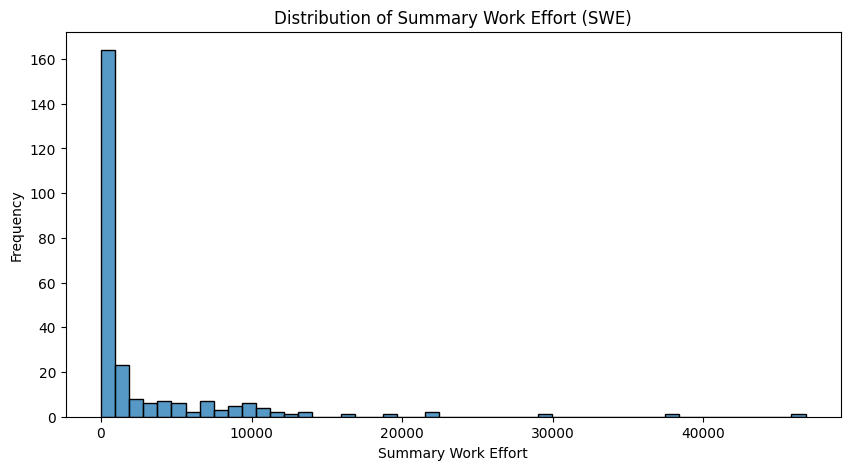

(np.float64(46787.0),)


In [24]:
df_clean = ISBG_interest.dropna(subset=['COSMIC Write'])
total_count = len(df_clean)
df_clean

# Assuming df_clean is your dataframe
for column in df_clean.columns:
    # Get the type of the column
    column_type = df_clean[column].dtype

    # If the column is numerical, calculate numerical statistics
    if column_type in ['int64', 'float64']:
        column_min = df_clean[column].min()
        column_max = df_clean[column].max()
        column_mean = df_clean[column].mean()
        column_sd = df_clean[column].std()
        column_mode = df_clean[column].mode()[0]  # Get the first mode (if multiple)
        column_var = df_clean[column].var()

        print(f"Column: {column}")
        print(f"Type: {column_type}")
        print(f"Min: {column_min}")
        print(f"Max: {column_max}")
        print(f"Mean: {column_mean}")
        print(f"SD: {column_sd}")
        print(f"Mode: {column_mode}")
        print(f"Var: {column_var}")
    else:
        # For categorical variables, just print the mode
        column_mode = df_clean[column].mode()[0]

        print(f"Column: {column}")
        print(f"Type: {column_type}")
        print(f"Mode: {column_mode}")

    print("-" * 40)  # Separator for readability

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df_encoded['Summary Work Effort'], kde=False, bins=50)  # Set bins and kde to False

plt.title('Distribution of Summary Work Effort (SWE)')
plt.xlabel('Summary Work Effort')
plt.ylabel('Frequency')
maxX = df_clean['Summary Work Effort'].max(),
plt.savefig('./plot/histogram.svg')
plt.show()
print(maxX)

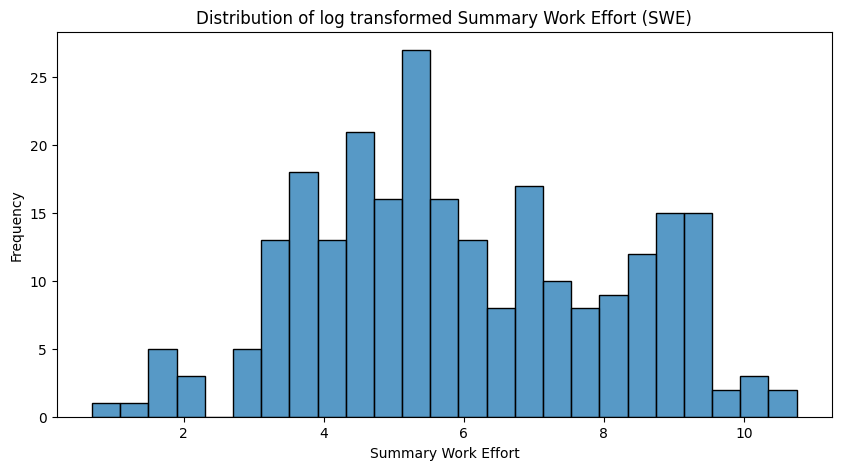

(np.float64(46787.0),)


In [25]:
plt.figure(figsize=(10,5))
sns.histplot(np.log(df_clean['Summary Work Effort']), kde=False, bins=25)  # Set bins and kde to False

plt.title('Distribution of log transformed Summary Work Effort (SWE)')
plt.xlabel('Summary Work Effort')
plt.ylabel('Frequency')
maxX = df_clean['Summary Work Effort'].max(),
plt.savefig('./plot/LogTransformedhistogram.svg')
plt.show()
print(maxX)

In [26]:
print(df_normalized.columns)

Index(['Max Team Size', 'COSMIC Read', 'COSMIC Write', 'COSMIC Entry',
       'COSMIC Exit', 'Functional Size', 'Project Elapsed Time',
       'Summary Work Effort', 'Development Platform_MF',
       'Development Platform_MR', 'Development Platform_Multi',
       'Development Platform_PC', 'Primary Programming Language_.Net',
       'Primary Programming Language_ABAP', 'Primary Programming Language_ASP',
       'Primary Programming Language_ASP.Net',
       'Primary Programming Language_AppBuilder',
       'Primary Programming Language_Assembler',
       'Primary Programming Language_C', 'Primary Programming Language_C#',
       'Primary Programming Language_C++',
       'Primary Programming Language_COBOL',
       'Primary Programming Language_J2EE',
       'Primary Programming Language_Java',
       'Primary Programming Language_Oracle',
       'Primary Programming Language_PHP', 'Primary Programming Language_PL/I',
       'Primary Programming Language_RPG',
       'Primary Programmi

   Max Team Size  COSMIC Read  COSMIC Write  COSMIC Entry  COSMIC Exit  \
0       0.088235     0.022018      0.059041      0.066212     0.076099   
1       0.088235     0.361468      0.202952      0.225901     0.307610   
2       0.000000     0.023853      0.001845      0.006816     0.005359   
3       0.088235     0.012844      0.012915      0.044791     0.019293   
4       0.029412     0.011009      0.014760      0.021422     0.020364   

   Functional Size  Project Elapsed Time  Summary Work Effort  \
0         0.087123              0.051325             0.009789   
1         0.394926              0.814712             0.053457   
2         0.011967              0.221790             0.000812   
3         0.036860              0.444136             0.005728   
4         0.025850              0.092088             0.015774   

   Development Platform_MF  Development Platform_MR  ...  \
0                      0.0                      0.0  ...   
1                      0.0                  

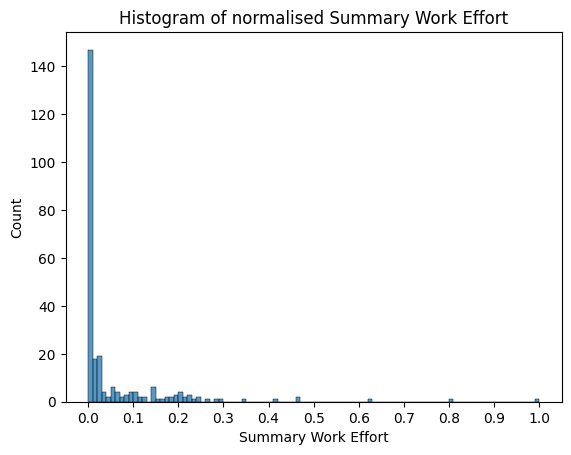

count    254.000000
mean       0.054240
std        0.117656
min        0.000000
25%        0.001667
50%        0.005792
75%        0.050214
max        1.000000
Name: Summary Work Effort, dtype: float64
0    0.000470
1    0.000812
2    0.001667
Name: Summary Work Effort, dtype: float64


In [28]:
import seaborn as sns
print (df_normalized.head())

sns.histplot(df_normalized['Summary Work Effort'], bins=100)
plt.title('Histogram of normalised Summary Work Effort')
plt.xticks(np.arange(0, 1.1, 0.1)) 
plt.show()

print(df_normalized['Summary Work Effort'].describe())
mode_value = df_normalized['Summary Work Effort'].mode()
print(mode_value)

In [30]:
# Assuming df_normalized is your dataframe
for column in df_normalized.columns:
    try:
        # Get the type of the column
        column_type = df_normalized[column].dtype

        # If the column is numerical, calculate numerical statistics
        if column_type in ['int64', 'float64']:
            column_min = df_normalized[column].min()
            column_max = df_normalized[column].max()
            column_mean = df_normalized[column].mean()
            column_sd = df_normalized[column].std()
            column_mode = df_normalized[column].mode()[0]  # Get the first mode (if multiple)
            column_var = df_normalized[column].var()

            print(f"Column: {column}")
            print(f"Type: {column_type}")
            print(f"Min: {column_min}")
            print(f"Max: {column_max}")
            print(f"Mean: {column_mean}")
            print(f"SD: {column_sd}")
            print(f"Mode: {column_mode}")
            print(f"Var: {column_var}")
        else:
            # For categorical variables, just print the mode
            column_mode = df_normalized[column].mode()[0]

            print(f"Column: {column}")
            print(f"Type: {column_type}")
            print(f"Mode: {column_mode}")
    except KeyError as e:
        print(f"KeyError: {e}. The column might not exist.")
    
    print("-" * 40)  # Separator for readability


Column: Max Team Size
Type: float64
Min: 0.0
Max: 0.9999999999999999
Mean: 0.11046780917091245
SD: 0.16518913625167805
Mode: 0.0
Var: 0.027287450735575456
----------------------------------------
Column: COSMIC Read
Type: float64
Min: 0.0
Max: 1.0
Mean: 0.08409304341544462
SD: 0.14295188461137845
Mode: 0.001834862385321101
Var: 0.020435241313944856
----------------------------------------
Column: COSMIC Write
Type: float64
Min: 0.0
Max: 1.0
Mean: 0.0496847488159921
SD: 0.11240638758838933
Mode: 0.0
Var: 0.012635195970671208
----------------------------------------
Column: COSMIC Entry
Type: float64
Min: 0.0
Max: 1.0
Mean: 0.050330064632865386
SD: 0.1087995822304973
Mode: 0.0009737098344693282
Var: 0.011837349093530743
----------------------------------------
Column: COSMIC Exit
Type: float64
Min: 0.0
Max: 1.0
Mean: 0.05935893865356862
SD: 0.12579304151803367
Mode: 0.0
Var: 0.015823889294357744
----------------------------------------
Column: Functional Size
Type: float64
Min: 0.0
Max: 

<Axes: >

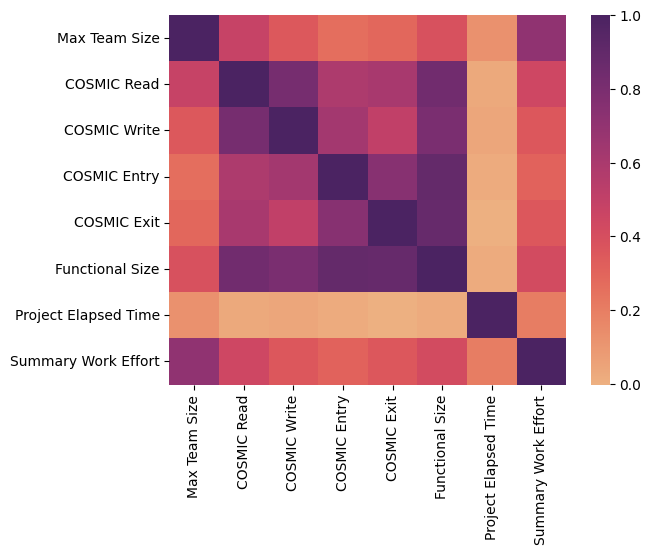

In [31]:
df_pairs = df_normalized[['Max Team Size', 'COSMIC Read', 'COSMIC Write', 'COSMIC Entry', 'COSMIC Exit', 'Functional Size', 'Project Elapsed Time', 'Summary Work Effort']]
cmap = sns.color_palette("flare", as_cmap=True)
corr = df_pairs.corr()
# plot the heatmap
sns.heatmap(corr,cmap=cmap)

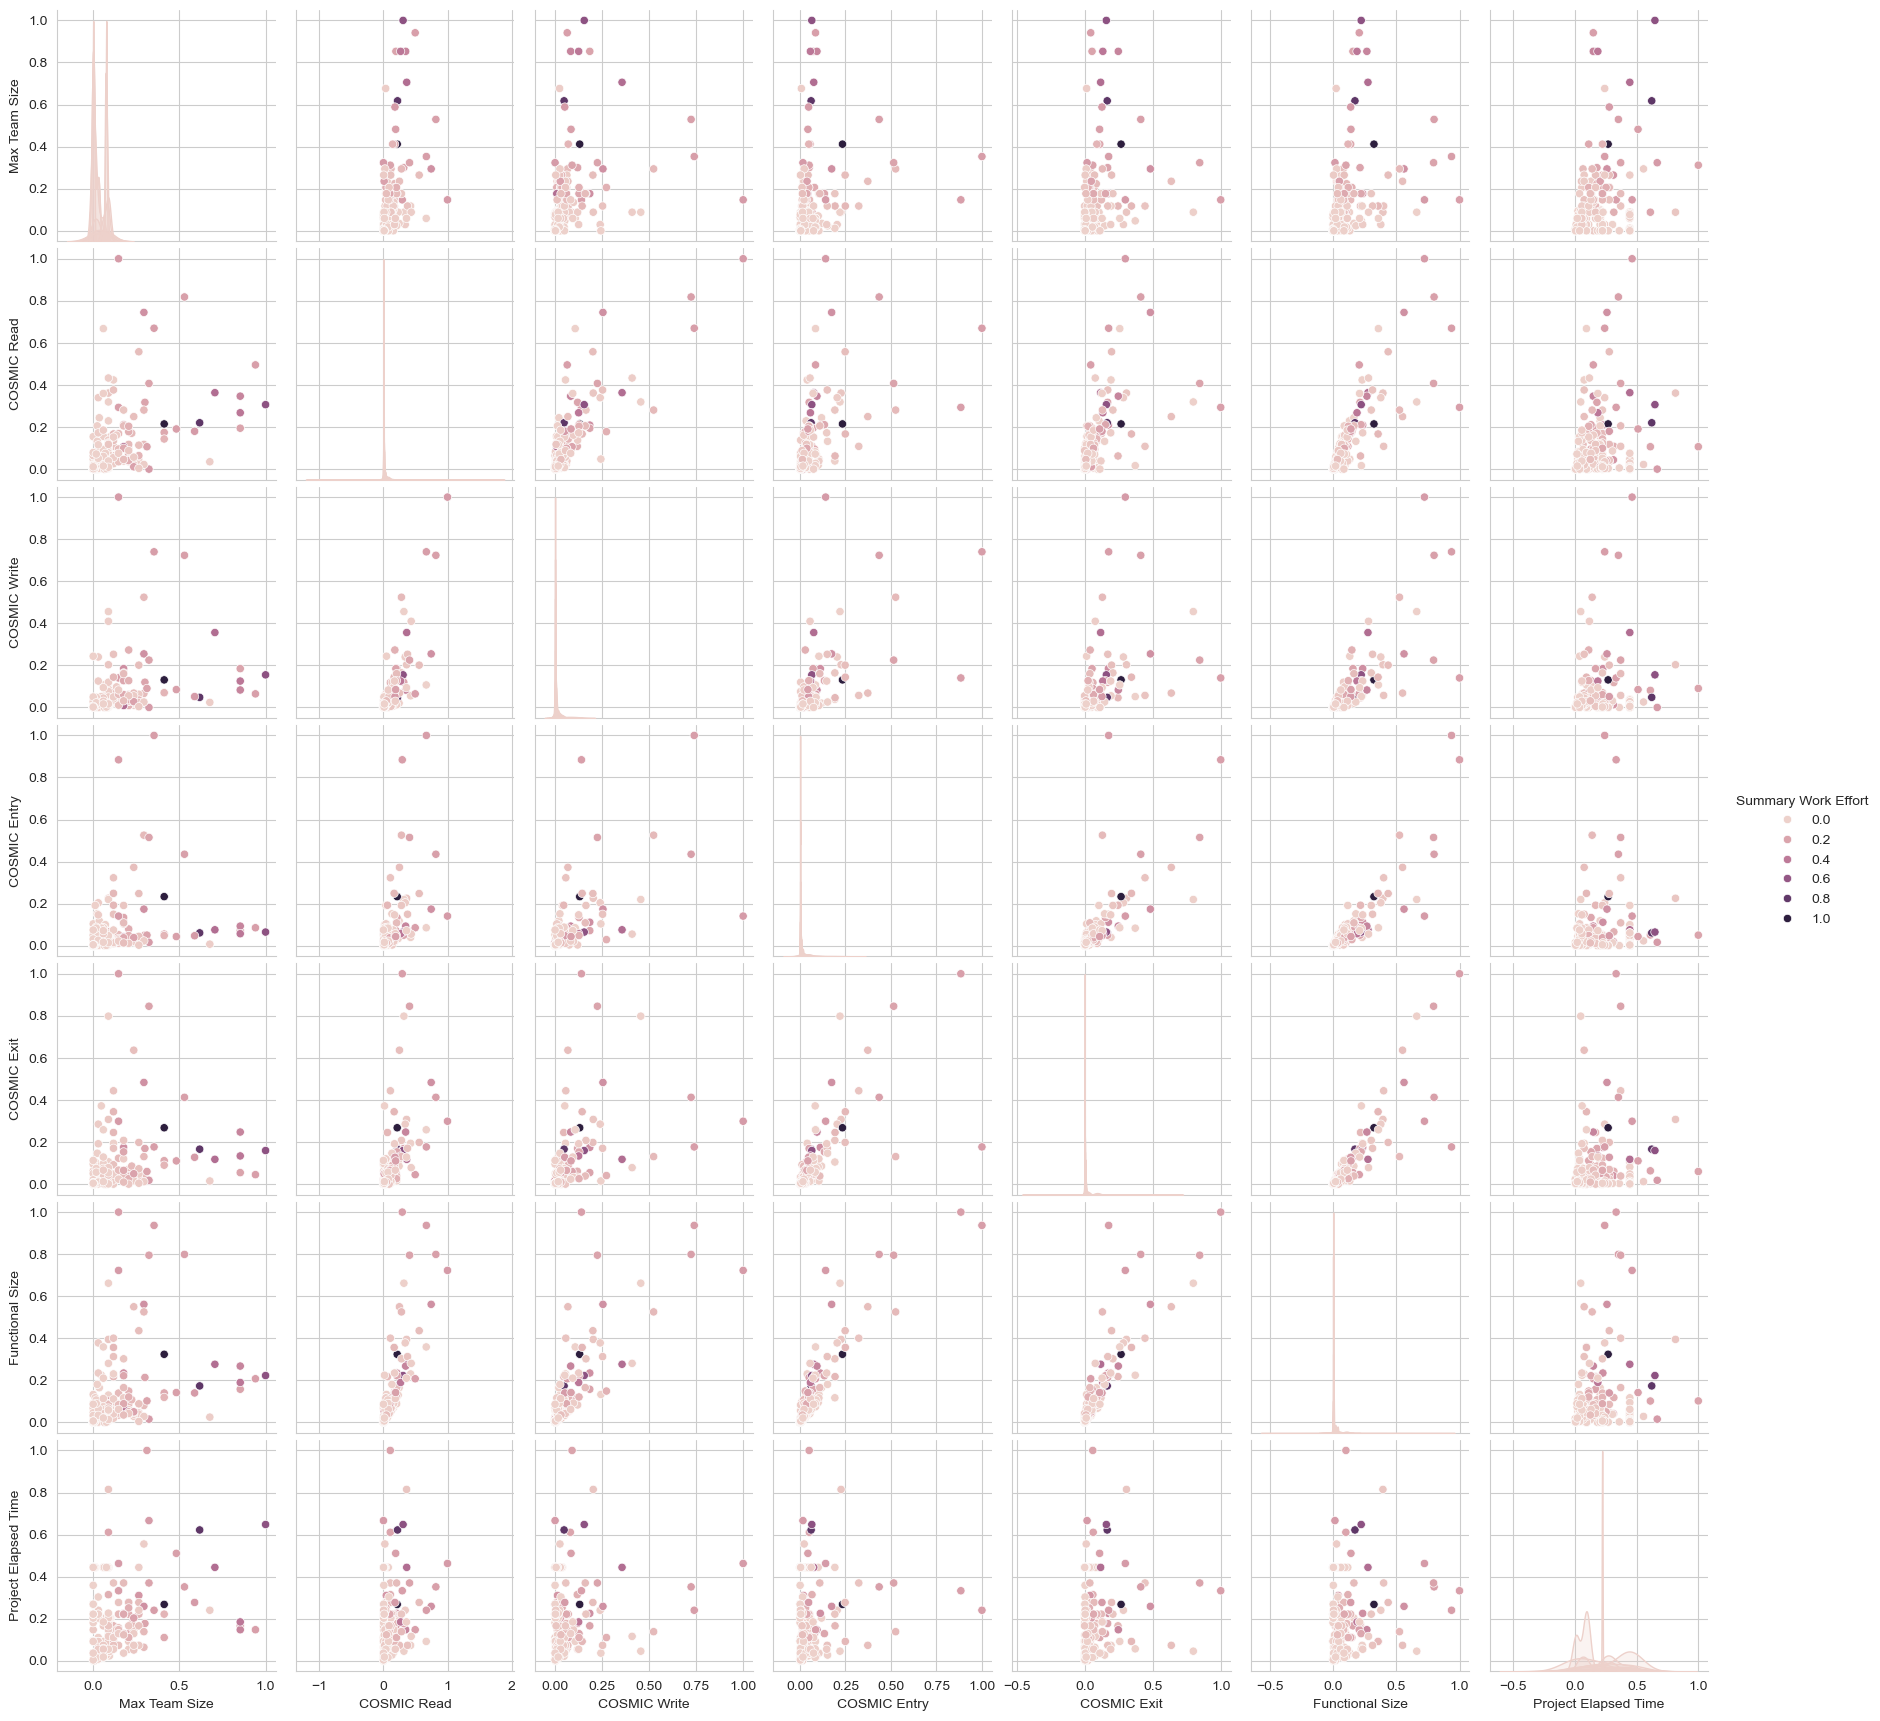

In [46]:
df_pairs = df_normalized[['Max Team Size', 'COSMIC Read', 'COSMIC Write', 'COSMIC Entry', 'COSMIC Exit', 'Functional Size', 'Project Elapsed Time', 'Summary Work Effort']]
sns.pairplot(df_pairs, hue='Summary Work Effort')
